In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math

In [74]:
z_h2_rot, z_h2_vib, mw_h2 = 87.55348628, 6332.330031, 2.01568/1000 # Divide by 1000 to go from g/mol to kg/mol
z_i2_rot, z_i2_vib, mw_i2 = 0.05366613048, 308.6162195, 253.8089/1000 # Divide by 1000 to go from g/mol to kg/mol
z_hi_rot, z_hi_vib, mw_hi = 9.24611362, 3322.134905, 127.91241/1000 # Divide by 1000 to go from g/mol to kg/mol

k_p = []
temperature = list(range(300,3001))

for T in temperature:
    z_h2 = 820.519 * ((mw_h2)**(3/2)) * (T**(5/2)) * (T/(2*z_h2_rot)) * (1/(1-(math.exp(-z_h2_vib/T))))
    z_i2 = 820.519 * ((mw_i2)**(3/2)) * (T**(5/2)) * (T/(2*z_i2_rot)) * (1/(1-(math.exp(-z_i2_vib/T))))
    z_hi = 820.519 * ((mw_hi)**(3/2)) * (T**(5/2)) * (T/(z_hi_rot)) * (1/(1-(math.exp(-z_hi_vib/T))))
    k_p.append(z_h2 * z_i2 / (z_hi**2) * math.exp(-0.08769/(8.6173303e-5*T)))

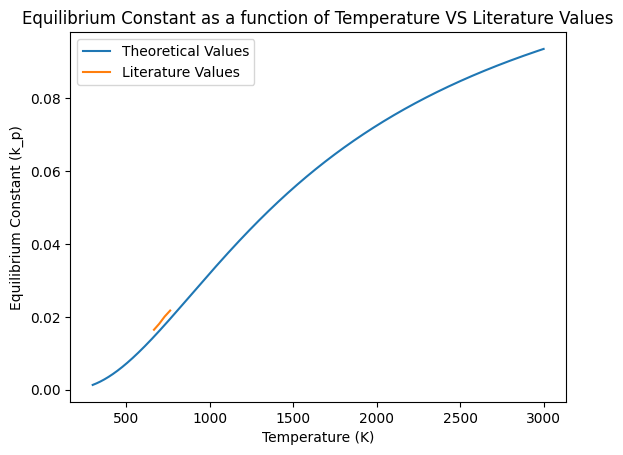

In [88]:
df = pd.DataFrame({'Temperature (K)':temperature, 'Equilibrium Constant (k_p)':k_p})
df_lit = pd.DataFrame({'Temperature (K)':[763.8, 730.8, 698.6, 666.8], 
                       'Equilibrium Constant (k_p)':[0.02172, 0.02007, 0.01811, 0.01645]})
sns.lineplot(data=df, x='Temperature (K)', y='Equilibrium Constant (k_p)', label='Theoretical Values')
sns.lineplot(data=df_lit, x='Temperature (K)', y='Equilibrium Constant (k_p)', label='Literature Values')
plt.title('Equilibrium Constant as a function of Temperature VS Literature Values')
plt.legend()